# Численное интегрирование методом трапеций

### Простая формула: 
Искомый интеграл на частичном отрезке $[x_{j-1},x_{j}]$ запишется следующим образом
$$\int_{x_{j-1}}^{x_{j}} f(x)dx \approx \frac{f(x_{j-1}) + f(x_{j})}{2}h$$
Погрешность для нее:
$$|\phi_{j}| \leq \frac{M_{2,j}h^{3}}{12}$$

### Состовная формула:
Составная формула интегрирования на всем отрезке $[a, b]$ примет вид
$$\int_{a}^{b}f(x)dx \approx \sum_{j=1}^{N}\frac{f(x_{j-1}) + f(x_{j})}{2}h = h\left[\frac{1}{2}(f_{1}+f_{N})+f_{2}+...+f_{N-1}\right]$$
Погрешность для нее:
$$|\phi| \leq \frac{h^{2}(b-a)}{12}M_{2}$$
где $M_{2} = max_{x\in(a,b)}|f''(x)|$

Теперь зададим какую-нибудь функцию, которую будем интегрировать и, соответственно, отрезок для нее. Например:

$$\int_{1}^{2}x^{2} + 1 \ dx$$

In [1]:
from __future__ import division
import math

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
function = 'x**2 + 1'
a = 1
b = 2
N = 1000

Вычислим значение интеграла методом трапеции:

In [4]:
def trapz_method(function, a, b, N):
    h = (b - a) / N
    func = np.zeros(N)
    for i in range(N):
        x = (a + i * h)
        func[i] += eval(function)
    integral = (func.sum() - 0.5 * (func[0] + func[N - 1])) * h
    return integral

In [5]:
I_t = trapz_method(function, a, b, N)

In [6]:
I_t

3.3283354994999996

Посчитаем то же значение интеграла более точным способом:

In [7]:
from scipy.integrate import quad

In [8]:
def integrand(x):
    return eval(function)

In [9]:
I = quad(integrand, a, b)

In [10]:
I[0]

3.3333333333333335

Разница между значениями интеграла:

In [11]:
abs(I[0] - I_t)

0.0049978338333338534

Посчитаем оба значения интеграла для разрывной функции:

$$\int_{1}^{2}\frac{1}{\sqrt{2-x}} \ dx$$

In [12]:
function = '1/math.sqrt(2-x)'

In [13]:
I_t = trapz_method(function, a, b, N)
I = quad(integrand, a, b)
abs(I[0] - I_t)

0.061991894358923494

Сделаем то же самое для осциллирующей функции:

$$\int_{1}^{2}x\ cos(8x) \ dx$$

In [14]:
function = 'x*math.cos(8*x)'

In [15]:
I_t = trapz_method(function, a, b, N)
I = quad(integrand, a, b)
abs(I[0] - I_t)

0.0019180873158499978

Теперь посмотрим на значение интеграла $\int_{1}^{2}x^{2} + 1 \ dx$ с увеличением мелкости сетки

In [16]:
function = 'x**2 + 1'

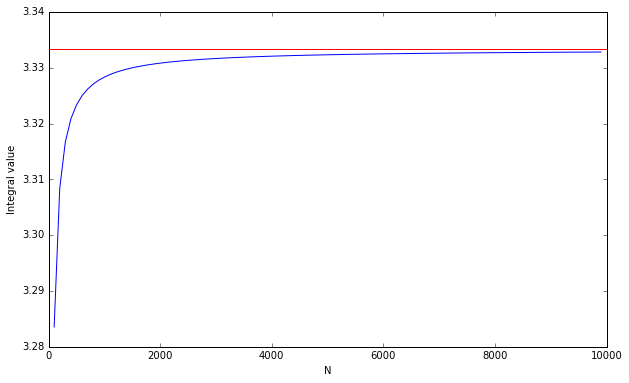

In [17]:
I_t_array = []
for N in xrange(100,10000,100):
    I_t_array.append(trapz_method(function, a, b, N))
x = np.arange(100,10000,100)
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, I_t_array)
plt.axhline(y=quad(integrand, a, b)[0], color='r')
plt.xlabel('N')
plt.ylabel('Integral value')
plt.show()

In [18]:
eps = quad(integrand, a, b)[0]

Теперь посмотрим на график погрешности:

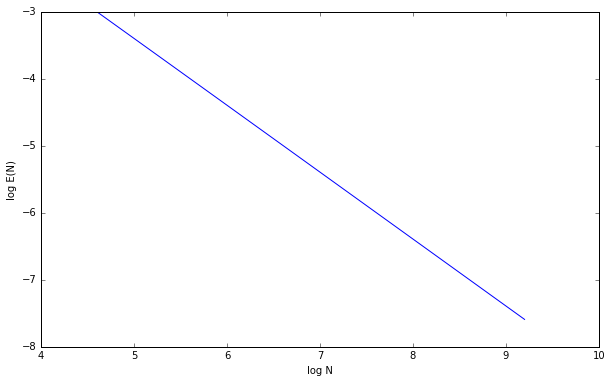

In [19]:
I_t_array_log = map(lambda a: math.log(abs(eps - a)), I_t_array)
x_log = map(lambda a: math.log(a), x)
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_log, I_t_array_log)
plt.xlabel('log N')
plt.ylabel('log E(N)')
plt.show()

Коэффициент наклона прямой отрицательный.
Видно, что с увеличением N погрешность уменьшается и приближенное значение интеграла становится близко к истинному.